In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, MissingIndicator

from tqdm import tqdm

plt.style.use('ggplot')

In [115]:
df = pd.read_csv('../data/df_freddie_mac.csv')

/home/austin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [116]:
df.head()

,Unnamed: 0,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_statistical_area_(msa)_or_metropolitan_division,mortgage_insurance_percentage_(mi_%),number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),...,number_of_borrowers,seller_name,servicer_name,super_conforming_flag,pre-harp_loan_sequence_number,program_indicator,harp_indicator,property_valuation_method,interest_only_indicator_(i/o_indicator),target
0,0,801,200202,N,203101,NaN,0,1,P,63,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
1,1,776,200202,N,203101,NaN,0,1,P,77,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
2,2,754,200202,N,203012,38060.0,0,1,P,72,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
3,3,795,200203,N,203011,36780.0,0,1,P,74,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
4,4,716,200204,N,203011,NaN,0,1,P,61,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991476 entries, 0 to 5991475
Data columns (total 33 columns):
 #   Column                                                        Dtype  
---  ------                                                        -----  
 0   Unnamed: 0                                                    int64  
 1   credit_score                                                  int64  
 2   first_payment_date                                            int64  
 3   first_time_homebuyer_flag                                     object 
 4   maturity_date                                                 int64  
 5   metropolitan_statistical_area_(msa)_or_metropolitan_division  float64
 6   mortgage_insurance_percentage_(mi_%)                          int64  
 7   number_of_units                                               int64  
 8   occupancy_status                                              object 
 9   original_combined_loan-to-value_(cltv)                   

In [118]:
df['first_time_homebuyer_flag'].value_counts()

N    3799343
9    1571317
Y     620816
Name: first_time_homebuyer_flag, dtype: int64

In [119]:
first_time_homebuyer_map = {'N': 'N'
                           , '9': 'Unknown'
                           , 'Y': 'Y'}
df['first_time_homebuyer_flag'] = df['first_time_homebuyer_flag'].map(first_time_homebuyer_map)
df['first_time_homebuyer_flag'].value_counts()

N          3799343
Unknown    1571317
Y           620816
Name: first_time_homebuyer_flag, dtype: int64

In [120]:
df['occupancy_status'].value_counts()

P    5547822
I     244697
S     190413
9       8544
Name: occupancy_status, dtype: int64

In [121]:
occupancy_status_map = {'P': 'P'
                        , '9': 'Unknown'
                        , 'I': 'I'
                        , 'S': 'S'}
occupancy_status = df['occupancy_status'].map(occupancy_status_map)
occupancy_status.value_counts()

P          5547822
I           244697
S           190413
Unknown       8544
Name: occupancy_status, dtype: int64

In [122]:
df['occupancy_status'] = occupancy_status

In [123]:
df['channel'].value_counts()

T    2998655
R    2985327
C       2946
B       2440
9       2108
Name: channel, dtype: int64

In [124]:
channel_map = {'T': 'T'
               , 'R': 'R'
               , 'C': 'C'
               , 'B': 'B'
               , '9': 'Unknown'}
channel = df['channel'].map(channel_map)
channel.value_counts()

T          2998655
R          2985327
C             2946
B             2440
Unknown       2108
Name: channel, dtype: int64

In [125]:
df['prepayment_penalty_mortgage_(ppm)_flag'].value_counts()

N    5948328
Y      43148
Name: prepayment_penalty_mortgage_(ppm)_flag, dtype: int64

In [126]:
df['amortization_type'].value_counts()

FRM    5723147
ARM     268329
Name: amortization_type, dtype: int64

In [127]:
df['property_state'].value_counts()

CA    691161
FL    381862
IL    336799
MI    316179
TX    292304
OH    274687
MN    207999
NY    203844
NC    201785
GA    196787
PA    179264
CO    179225
VA    169909
AZ    164756
NJ    157526
IN    154656
WI    152684
WA    151252
MO    142375
MA    124442
MD    118863
OR    103643
KY     95588
SC     93499
TN     84628
IA     66363
UT     63719
AL     63658
NV     60888
CT     56835
KS     53631
OK     42629
NE     36327
ID     36129
NH     33864
NM     31645
LA     31174
PR     23174
AR     22825
ME     21126
DE     19488
VT     18944
MT     18912
WV     18507
RI     17465
MS     16272
SD     13471
HI     10429
WY      9903
DC      9895
AK      9317
ND      7995
GU      1158
VI        16
Name: property_state, dtype: int64

In [128]:
df['property_type'].value_counts()

SF    4933461
PU     610997
CO     413097
MH      28010
CP       4812
99       1099
Name: property_type, dtype: int64

In [129]:
property_type_map = {'SF': 'SF'
                     , 'PU': 'PU'
                     , 'CO': 'CO'
                     , 'MH': 'MH'
                     , 'CP': 'CP'
                     , '99': 'Unknown'}
property_type = df['property_type'].map(property_type_map)
property_type.value_counts()

SF         4933461
PU          610997
CO          413097
MH           28010
CP            4812
Unknown       1099
Name: property_type, dtype: int64

In [130]:
df['property_type'] = property_type

In [131]:
df['loan_sequence_number'].value_counts().max()

1

In [132]:
df['loan_purpose'].value_counts()

P    2653163
N    1915111
C    1414579
9       8623
Name: loan_purpose, dtype: int64

In [133]:
df['seller_name'].value_counts()

Other sellers                                                   1343774
WELLS FARGO HOME MORTGAGE, INC.                                 1026626
ABN AMRO MORTGAGE GROUP, INC.                                    604674
BANK OF AMERICA, N.A.                                            465277
NORWEST MORTGAGE, INC.                                           384485
PRINCIPAL RESIDENTIAL MORTGAGE, INC.                             234997
FIFTH THIRD BANK                                                 170928
COUNTRYWIDE HOME LOANS, INC.                                     159078
NATIONAL CITY MORTGAGE CO.                                       148824
CHASE MANHATTAN MORTGAGE CORPORATION                             139536
FIRSTAR BANK, N.A.                                               119868
SUNTRUST MORTGAGE, INC.                                          116106
WASHINGTON MUTUAL BANK                                           108106
NATIONAL CITY MORTGAGE COMPANY                                  

In [134]:
df['servicer_name'].value_counts()

Other servicers                                                 1253697
WELLS FARGO HOME MORTGAGE, INC.                                 1082991
BANK OF AMERICA, N.A.                                            708759
ABN AMRO MORTGAGE GROUP, INC.                                    480626
CHASE MANHATTAN MORTGAGE CORPORATION                             418318
WELLS FARGO BANK, N.A.                                           316813
WASHINGTON MUTUAL BANK                                           236607
NATIONAL CITY MORTGAGE CO.                                       235774
PRINCIPAL RESIDENTIAL MORTGAGE, INC.                             184002
GMAC MORTGAGE CORPORATION                                        152636
FIFTH THIRD BANK                                                 147931
CITIMORTGAGE, INC.                                               143835
COUNTRYWIDE HOME LOANS, INC.                                     143744
BRANCH BANKING & TRUST COMPANY                                  

In [135]:
servicer_name_map = {}
for name in df['servicer_name'].value_counts().index.unique():
    if name == 'U.S. BANK N.A.':
        servicer_name_map[name] = 'U.S. BANK, N.A.'
    else:
        servicer_name_map[name] = name
        
servicer_name = df['servicer_name'].map(servicer_name_map)
servicer_name.value_counts()

Other servicers                                                 1253697
WELLS FARGO HOME MORTGAGE, INC.                                 1082991
BANK OF AMERICA, N.A.                                            708759
ABN AMRO MORTGAGE GROUP, INC.                                    480626
CHASE MANHATTAN MORTGAGE CORPORATION                             418318
WELLS FARGO BANK, N.A.                                           316813
WASHINGTON MUTUAL BANK                                           236607
NATIONAL CITY MORTGAGE CO.                                       235774
PRINCIPAL RESIDENTIAL MORTGAGE, INC.                             184002
GMAC MORTGAGE CORPORATION                                        152636
FIFTH THIRD BANK                                                 147931
CITIMORTGAGE, INC.                                               143835
COUNTRYWIDE HOME LOANS, INC.                                     143744
BRANCH BANKING & TRUST COMPANY                                  

In [136]:
df['servicer_name'] = servicer_name

In [137]:
df['program_indicator'].value_counts()

9    4800512
9    1190447
H        517
Name: program_indicator, dtype: int64

In [138]:
program_indicator_map = {9: 'Unknown'
                        , '9': 'Unknown'
                        , 'H': 'H'}
        
program_indicator = df['program_indicator'].map(program_indicator_map)
program_indicator.value_counts()

Unknown    5990959
H              517
Name: program_indicator, dtype: int64

In [139]:
df['program_indicator'] = program_indicator

In [140]:
df['interest_only_indicator_(i/o_indicator)'].value_counts()

N    5991473
Y          3
Name: interest_only_indicator_(i/o_indicator), dtype: int64

In [141]:
df.isnull().sum()/df.shape[0]

Unnamed: 0                                                      0.000000
credit_score                                                    0.000000
first_payment_date                                              0.000000
first_time_homebuyer_flag                                       0.000000
maturity_date                                                   0.000000
metropolitan_statistical_area_(msa)_or_metropolitan_division    0.476779
mortgage_insurance_percentage_(mi_%)                            0.000000
number_of_units                                                 0.000000
occupancy_status                                                0.000000
original_combined_loan-to-value_(cltv)                          0.000000
original_debt-to-income_(dti)_ratio                             0.000000
original_upb                                                    0.000000
original_loan-to-value_(ltv)                                    0.000000
original_interest_rate                             

In [142]:
labels = ['pre-harp_loan_sequence_number', 'harp_indicator'
         , 'super_conforming_flag', 'metropolitan_statistical_area_(msa)_or_metropolitan_division']
df.drop(labels=labels, axis=1, inplace=True)

In [143]:
df.dropna(subset=['target'], inplace=True)

In [144]:
df.isnull().sum()/df.shape[0]

Unnamed: 0                                 0.0
credit_score                               0.0
first_payment_date                         0.0
first_time_homebuyer_flag                  0.0
maturity_date                              0.0
mortgage_insurance_percentage_(mi_%)       0.0
number_of_units                            0.0
occupancy_status                           0.0
original_combined_loan-to-value_(cltv)     0.0
original_debt-to-income_(dti)_ratio        0.0
original_upb                               0.0
original_loan-to-value_(ltv)               0.0
original_interest_rate                     0.0
channel                                    0.0
prepayment_penalty_mortgage_(ppm)_flag     0.0
amortization_type                          0.0
property_state                             0.0
property_type                              0.0
postal_code                                0.0
loan_sequence_number                       0.0
loan_purpose                               0.0
original_loan

In [145]:
df.describe()

,Unnamed: 0,credit_score,first_payment_date,maturity_date,mortgage_insurance_percentage_(mi_%),number_of_units,original_combined_loan-to-value_(cltv),original_debt-to-income_(dti)_ratio,original_upb,original_loan-to-value_(ltv),original_interest_rate,postal_code,original_loan_term,number_of_borrowers,property_valuation_method,target
count,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5.991294e+06,5991294.0,5.991294e+06
mean,2.077777e+05,7.897567e+02,2.000472e+05,2.025930e+05,7.166120e+01,1.033193e+00,7.518439e+01,8.557874e+01,1.300426e+05,7.483373e+01,7.198174e+00,5.257954e+04,3.066553e+02,1.784436e+00,9.0,8.952841e-02
std,1.993797e+05,8.303318e+02,1.023623e+02,7.032023e+02,2.461848e+02,6.273808e-01,4.027103e+01,2.208458e+02,6.265705e+04,4.007959e+01,7.721498e-01,2.870343e+04,8.441195e+01,3.942738e+00,0.0,2.855050e-01
min,0.000000e+00,3.000000e+02,1.999010e+05,2.000040e+05,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,2.000000e+03,6.000000e+00,1.750000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,9.0,0.000000e+00
25%,6.241000e+04,6.790000e+02,1.999110e+05,2.017020e+05,0.000000e+00,1.000000e+00,6.500000e+01,2.500000e+01,8.000000e+04,6.500000e+01,6.750000e+00,3.000000e+04,1.820000e+02,1.000000e+00,9.0,0.000000e+00
50%,1.332840e+05,7.240000e+02,2.001030e+05,2.030010e+05,0.000000e+00,1.000000e+00,7.900000e+01,3.300000e+01,1.200000e+05,7.900000e+01,7.000000e+00,4.930000e+04,3.600000e+02,2.000000e+00,9.0,0.000000e+00
75%,3.050280e+05,7.610000e+02,2.001100e+05,2.031050e+05,2.000000e+01,1.000000e+00,8.500000e+01,4.200000e+01,1.700000e+05,8.300000e+01,7.750000e+00,8.000000e+04,3.600000e+02,2.000000e+00,9.0,0.000000e+00
max,9.217240e+05,9.999000e+03,2.017070e+05,2.055050e+05,9.990000e+02,9.900000e+01,9.990000e+02,9.990000e+02,5.780000e+05,9.990000e+02,1.405000e+01,9.990000e+04,5.840000e+02,9.900000e+01,9.0,1.000000e+00


<AxesSubplot:>

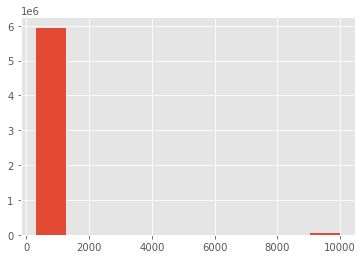

In [146]:
df['credit_score'].hist()

In [147]:
df[df['credit_score'] > 1000]['target'].sum()/df[df['credit_score'] > 1000]['target'].count()
# percent postive when credit score > 1000

0.10411944519536692

In [148]:
df[df['credit_score'] <= 1000]['target'].sum()/df[df['credit_score'] <= 1000]['target'].count()
# percent postive when credit score <= 1000

0.08941034340898556

In [149]:
df[df['credit_score'] > 1000]['target'].count() / df.shape[0]

0.008026479755458504

In [150]:
df[df['credit_score'] > 1000]

,Unnamed: 0,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,mortgage_insurance_percentage_(mi_%),number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),original_debt-to-income_(dti)_ratio,...,loan_sequence_number,loan_purpose,original_loan_term,number_of_borrowers,seller_name,servicer_name,program_indicator,property_valuation_method,interest_only_indicator_(i/o_indicator),target
121,121,9999,200101,Unknown,203012,0,1,S,44,43,...,F00Q40000173,C,360,2,"BANK OF AMERICA, N.A.","BANK OF AMERICA, N.A.",Unknown,9,N,0.0
475,475,9999,200101,N,203012,0,1,P,80,42,...,F00Q40000589,P,360,1,Other sellers,CHASE MANHATTAN MORTGAGE CORPORATION,Unknown,9,N,1.0
491,491,9999,200101,Y,203012,999,2,P,90,40,...,F00Q40000607,P,360,2,Other sellers,GMAC MORTGAGE CORPORATION,Unknown,9,N,1.0
668,668,9999,200012,N,201511,0,1,P,80,41,...,F00Q40000845,P,180,2,Other sellers,Other servicers,Unknown,9,N,0.0
724,724,9999,200101,Unknown,203012,0,2,S,79,25,...,F00Q40000901,P,360,2,"WELLS FARGO HOME MORTGAGE, INC.","WELLS FARGO HOME MORTGAGE, INC.",Unknown,9,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989131,134968,9999,200106,N,203105,0,1,I,66,20,...,A01Q20020233,N,360,1,FIFTH THIRD BANK,FIFTH THIRD BANK,Unknown,9,N,1.0
5990449,136286,9999,200108,Unknown,203107,0,1,P,98,999,...,F01Q20745127,P,360,1,Other sellers,Other servicers,Unknown,9,N,0.0
5990869,136706,9999,200105,Unknown,201604,0,99,P,100,999,...,F01Q20745683,N,180,1,"BANK OF AMERICA, N.A.","BANK OF AMERICA, N.A.",Unknown,9,N,1.0
5990925,136762,9999,200106,Unknown,203105,0,1,P,100,999,...,F01Q20745739,P,360,1,Other sellers,Other servicers,Unknown,9,N,1.0


In [151]:
imp = SimpleImputer(missing_values=9999, strategy='mean')
imp.fit(np.array(df['credit_score']).reshape(-1, 1))
indicator = MissingIndicator(missing_values=9999)
mask_missing_cs = indicator.fit_transform(np.array(df['credit_score']).reshape(-1, 1))
credit_score_mean_imputed = imp.transform(np.array(df['credit_score']).reshape(-1, 1))


In [152]:
df['missing_credit_score'] = mask_missing_cs
df['credit_score'] = credit_score_mean_imputed


In [153]:
df['credit_score'].max()

850.0

In [154]:
df['credit_score'].min()

300.0

<AxesSubplot:>

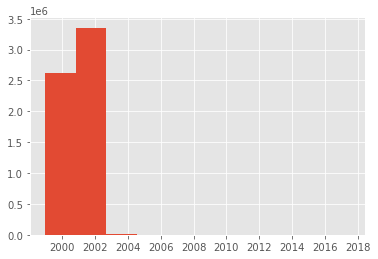

In [155]:
df['first_payment_date'] = pd.to_datetime(df['first_payment_date'], format='%Y%m')
df['first_payment_date'].hist()

In [156]:
df['first_payment_date_year'] = df['first_payment_date'].dt.year
df['first_payment_date_month'] = df['first_payment_date'].dt.month

<AxesSubplot:>

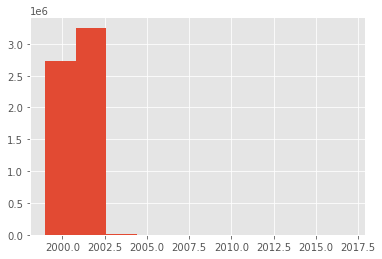

In [157]:
df['first_payment_date_year'].hist()

<AxesSubplot:>

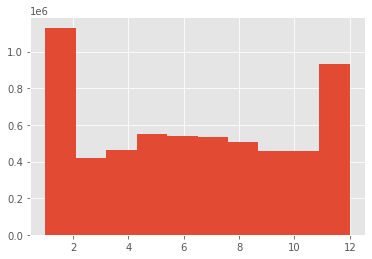

In [158]:
df['first_payment_date_month'].hist()

In [159]:
df.drop(labels='first_payment_date', axis=1, inplace=True)

In [160]:
df.drop(labels='maturity_date', axis=1, inplace=True)

<AxesSubplot:>

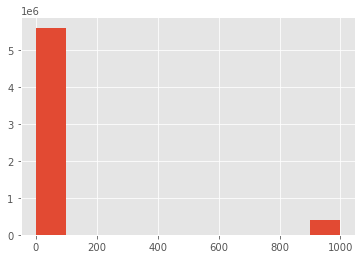

In [161]:
df['mortgage_insurance_percentage_(mi_%)'].hist()

In [162]:
col = 'mortgage_insurance_percentage_(mi_%)'
imp = SimpleImputer(missing_values=999, strategy='mean')
imp.fit(np.array(df[col]).reshape(-1, 1))
indicator = MissingIndicator(missing_values=999)
mask_missing_mi = indicator.fit_transform(np.array(df[col]).reshape(-1, 1))
mi_mean_imputed = imp.transform(np.array(df[col]).reshape(-1, 1))

In [163]:
df['missing_' + col] = mask_missing_mi
df[col] = mi_mean_imputed

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5991294 entries, 0 to 5991475
Data columns (total 31 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Unnamed: 0                                    int64  
 1   credit_score                                  float64
 2   first_time_homebuyer_flag                     object 
 3   mortgage_insurance_percentage_(mi_%)          float64
 4   number_of_units                               int64  
 5   occupancy_status                              object 
 6   original_combined_loan-to-value_(cltv)        int64  
 7   original_debt-to-income_(dti)_ratio           int64  
 8   original_upb                                  int64  
 9   original_loan-to-value_(ltv)                  int64  
 10  original_interest_rate                        float64
 11  channel                                       object 
 12  prepayment_penalty_mortgage_(ppm)_flag        object 
 1

In [165]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [166]:
dict_ = {'number_of_units': {'missing_value': 99, 'strategy':'mean'}
        , 'occupancy_status': {'missing_value': 'Unknown', 'strategy':'most_frequent'}
        , 'original_combined_loan-to-value_(cltv)': {'missing_value': 999, 'strategy':'mean'}
        , 'original_debt-to-income_(dti)_ratio': {'missing_value': 999, 'strategy':'mean'}
        , 'original_loan-to-value_(ltv)': {'missing_value': 999, 'strategy':'mean'}
        , 'channel': {'missing_value': '9', 'strategy':'most_frequent'}
        , 'property_type': {'missing_value': 'Unknown', 'strategy':'most_frequent'}
        , 'loan_purpose': {'missing_value': '9', 'strategy':'most_frequent'}
        , 'number_of_borrowers': {'missing_value': 99, 'strategy':'mean'}}


    

In [167]:
df[dict_.keys()]

,number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),original_debt-to-income_(dti)_ratio,original_loan-to-value_(ltv),channel,property_type,loan_purpose,number_of_borrowers
0,1,P,63,35,63,T,SF,P,2
1,1,P,77,34,76,T,SF,P,2
2,1,P,72,42,72,T,SF,P,2
3,1,P,74,38,74,T,SF,P,2
4,1,P,61,37,61,T,SF,P,2
...,...,...,...,...,...,...,...,...,...
5991471,1,P,106,23,96,R,SF,P,1
5991472,1,P,83,999,83,R,SF,N,2
5991473,1,P,69,60,69,R,SF,P,1
5991474,1,P,100,40,100,R,SF,P,1


In [168]:
for col in dict_.keys():
    kwargs = dict_[col]
    missing_val = kwargs['missing_value']
    strategy = kwargs['strategy']
    print(col, kwargs)

    
    imp = SimpleImputer(missing_values=missing_val, strategy=strategy)
    imp.fit(np.array(df[col].sample(10_000)).reshape(-1, 1))
    
    indicator = MissingIndicator(missing_values=missing_val)
    
    mask_missing = indicator.fit_transform(np.array(df[col]).reshape(-1, 1))
    mean_imputed = imp.transform(np.array(df[col]).reshape(-1, 1))
    
    df['mask_missing_' + col] = mask_missing
    df[col + '_' + strategy + '_imputed'] = mean_imputed

number_of_units {'missing_value': 99, 'strategy': 'mean'}
occupancy_status {'missing_value': 'Unknown', 'strategy': 'most_frequent'}
original_combined_loan-to-value_(cltv) {'missing_value': 999, 'strategy': 'mean'}
original_debt-to-income_(dti)_ratio {'missing_value': 999, 'strategy': 'mean'}
original_loan-to-value_(ltv) {'missing_value': 999, 'strategy': 'mean'}
channel {'missing_value': '9', 'strategy': 'most_frequent'}
property_type {'missing_value': 'Unknown', 'strategy': 'most_frequent'}
loan_purpose {'missing_value': '9', 'strategy': 'most_frequent'}
number_of_borrowers {'missing_value': 99, 'strategy': 'mean'}


In [169]:
df.drop(labels=dict_.keys(), axis=1, inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5991294 entries, 0 to 5991475
Data columns (total 39 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   credit_score                                         float64
 1   first_time_homebuyer_flag                            object 
 2   mortgage_insurance_percentage_(mi_%)                 float64
 3   original_upb                                         int64  
 4   original_interest_rate                               float64
 5   prepayment_penalty_mortgage_(ppm)_flag               object 
 6   amortization_type                                    object 
 7   property_state                                       object 
 8   postal_code                                          int64  
 9   loan_sequence_number                                 object 
 10  original_loan_term                                   int64  
 11  seller_name             

In [174]:
dummy_cols = ['first_time_homebuyer_flag', 'prepayment_penalty_mortgage_(ppm)_flag'
              , 'amortization_type', 'program_indicator', 'property_valuation_method'
              , 'interest_only_indicator_(i/o_indicator)', 'occupancy_status_most_frequent_imputed'
              , 'channel_most_frequent_imputed', 'property_type_most_frequent_imputed'
              , 'loan_purpose_most_frequent_imputed']
df = pd.get_dummies(df, columns=dummy_cols, drop_first=True, dummy_na=True)

In [ ]:
df.drop(labels=['property_state', 'postal_code', 'loan_sequence_number', 'seller_name', 'servicer_name']
        , axis=1, inplace=True) # cardinaltiy too high

In [176]:
df.shape

(5991294, 51)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5991294 entries, 0 to 5991475
Data columns (total 51 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   credit_score                                         float64
 1   mortgage_insurance_percentage_(mi_%)                 float64
 2   original_upb                                         int64  
 3   original_interest_rate                               float64
 4   original_loan_term                                   int64  
 5   target                                               float64
 6   missing_credit_score                                 bool   
 7   first_payment_date_year                              int64  
 8   first_payment_date_month                             int64  
 9   missing_mortgage_insurance_percentage_(mi_%)         bool   
 10  mask_missing_number_of_units                         bool   
 11  number_of_units_mean_imp

In [179]:
df.isnull().sum()

credit_score                                           0
mortgage_insurance_percentage_(mi_%)                   0
original_upb                                           0
original_interest_rate                                 0
original_loan_term                                     0
target                                                 0
missing_credit_score                                   0
first_payment_date_year                                0
first_payment_date_month                               0
missing_mortgage_insurance_percentage_(mi_%)           0
mask_missing_number_of_units                           0
number_of_units_mean_imputed                           0
mask_missing_occupancy_status                          0
mask_missing_original_combined_loan-to-value_(cltv)    0
original_combined_loan-to-value_(cltv)_mean_imputed    0
mask_missing_original_debt-to-income_(dti)_ratio       0
original_debt-to-income_(dti)_ratio_mean_imputed       0
mask_missing_original_loan-to-v

In [178]:
df.to_csv('../data/df_preprocessed_freddie_mac.csv')